<a href="https://colab.research.google.com/github/ShalviSrivastava/Student-Dropout-Prediction/blob/main/Predicting_Student_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORTING THE DEPENDENCIES

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [106]:
from google.colab import drive
drive.mount('/content/drive')
# Mounting the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. DATA LAODING AND UNDERSTANDING

In [107]:
# read the csv data to a pandas dataframe
df = pd.read_csv("/content/student dropout.csv")

Initial Encoding

In [108]:
df.shape
# It gives the dimension of the dataset ; how many rows and columns exist

(649, 34)

In [109]:
df.head()
# It is used in Python with pandas to display the first 5 rows of a DataFrame df.

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,False


In [110]:
df.tail()
# It is used in Python with pandas to display the last 5 rows of a DataFrame df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,False
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11,False


In [111]:
df.info()
# Used to list out all the columns of the dataset
# Tells the number of non null entries in each row
# Also tells the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [112]:
df.isnull().sum()
# It gives us the sum of all the null values present in the dataset, COLUMN-WISE

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


Check all the unique values in the categorical columns and analyses it.... as it avoids Avoid Overfitting • Reduce Model Complexity

In [113]:
for col in df.columns:
  extensive_features = ["Age", "Number_of_Absences", "Grade_1", "Grade_2", "Final_Grade"]
  if col not in extensive_features:
    print(col, df[col].unique())
    print("-"*50)

#Loops through each column name in the DataFrame df.
# It prints the unique values of all non-numerical columns in a pandas DataFrame.
#print(col, df[col].unique()):Prints the column name and all its unique values.
#Prints a separator line of 50 dashes (-) for clarity.

School ['GP' 'MS']
--------------------------------------------------
Gender ['F' 'M']
--------------------------------------------------
Address ['U' 'R']
--------------------------------------------------
Family_Size ['GT3' 'LE3']
--------------------------------------------------
Parental_Status ['A' 'T']
--------------------------------------------------
Mother_Education [4 1 3 2 0]
--------------------------------------------------
Father_Education [4 1 2 3 0]
--------------------------------------------------
Mother_Job ['at_home' 'health' 'other' 'services' 'teacher']
--------------------------------------------------
Father_Job ['teacher' 'other' 'services' 'health' 'at_home']
--------------------------------------------------
Reason_for_Choosing_School ['course' 'other' 'home' 'reputation']
--------------------------------------------------
Guardian ['mother' 'father' 'other']
--------------------------------------------------
Travel_Time [2 1 3 4]
----------------------------

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df. describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [116]:
# taget class distribution
df["Dropped_Out"].value_counts()

#huge class imbalance in the class distribution

,count
Dropped_Out,
False,549
True,100


**INSIGHTS :**

1. Checked for the datatype of each column
2. No missing values in any column
3. No dulpicate data/row
4. Checked for the number of unique values in each column
5. Identified class imabalance in target column

3. EXPLORATORY DATA ANALYSIS

In [117]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

**Univariate Analysis**

Numerical Columns

*   Age
*   Number_of_Absences
*   Grade_1
*   Grade_2
*   Final_Grade

Distribution Plots

Mean age: 16.7442218798151
Median age: 17.0


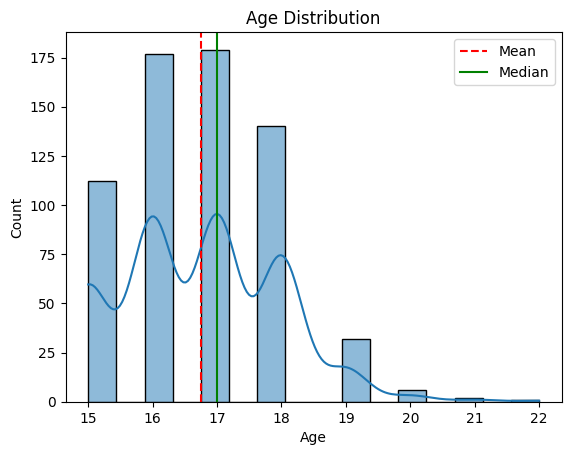

In [118]:
# Histogram for "age"

sns.histplot(df["Age"],kde=True)
plt.title("Age Distribution")

# Calculate mean and median of age
mean_age = df["Age"].mean()
median_age = df["Age"].median()

# Print values
print("Mean age:", mean_age)
print("Median age:", median_age)

# Draw vertical lines for mean and median on the plot
plt.axvline(mean_age, color="red", linestyle="--", label="Mean")
plt.axvline(median_age, color="green", linestyle="-", label="Median")

# Show the legend and the plot
plt.legend()
plt.show()

#plt.axvline:This draws a vertical line on your plot at position x (on the x-axis).
# density plot—to show where the mean and median values of the "age" column lie.

Mean: 3.6594761171032357
Median: 2.0


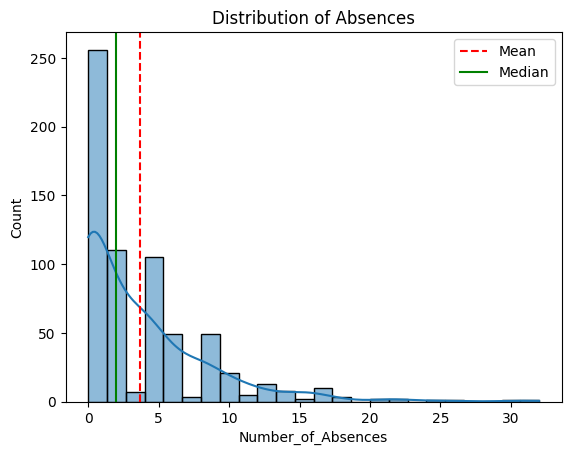

In [119]:
# Histogram for "Number_of_Absences"

sns.histplot(df["Number_of_Absences"], kde=True)
plt.title("Distribution of Absences")

# calculate mean and median
absences_mean = df["Number_of_Absences"].mean()
absences_median = df["Number_of_Absences"].median()

print("Mean:", absences_mean)
print("Median:", absences_median)


# add vertical lines for mean and median
plt.axvline(absences_mean, color="red", linestyle="--", label="Mean")
plt.axvline(absences_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 11.399075500770415
Median: 11.0


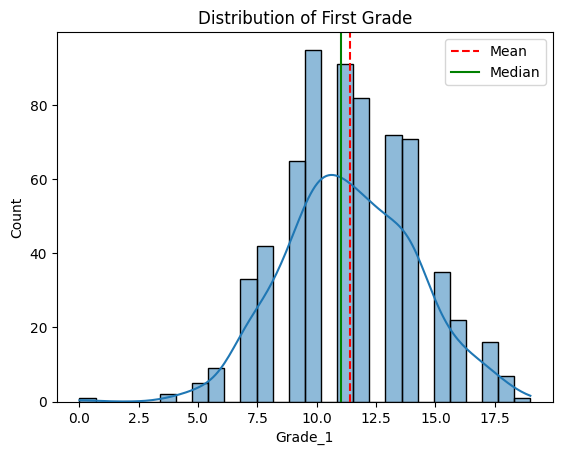

In [120]:
# Histogram for "Grade_1"

sns.histplot(df["Grade_1"], kde=True)
plt.title("Distribution of First Grade")

# calculate mean and median
grade_1_mean = df["Grade_1"].mean()
grade_1_median = df["Grade_1"].median()

print("Mean:", grade_1_mean)
print("Median:", grade_1_median)


# add vertical lines for mean and median
plt.axvline(grade_1_mean, color="red", linestyle="--", label="Mean")
plt.axvline(grade_1_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 11.399075500770415
Median: 11.0


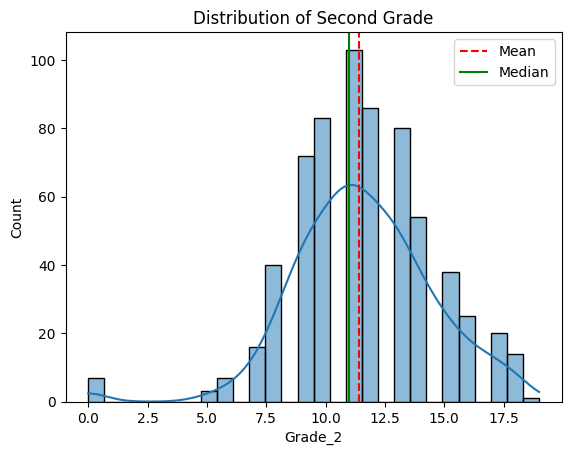

In [121]:
# Histogram for "Grade_2"

sns.histplot(df["Grade_2"], kde=True)
plt.title("Distribution of Second Grade")

# calculate mean and median
grade_2_mean = df["Grade_1"].mean()
grade_2_median = df["Grade_1"].median()

print("Mean:", grade_2_mean)
print("Median:", grade_2_median)


# add vertical lines for mean and median
plt.axvline(grade_2_mean, color="red", linestyle="--", label="Mean")
plt.axvline(grade_2_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 11.906009244992296
Median: 12.0


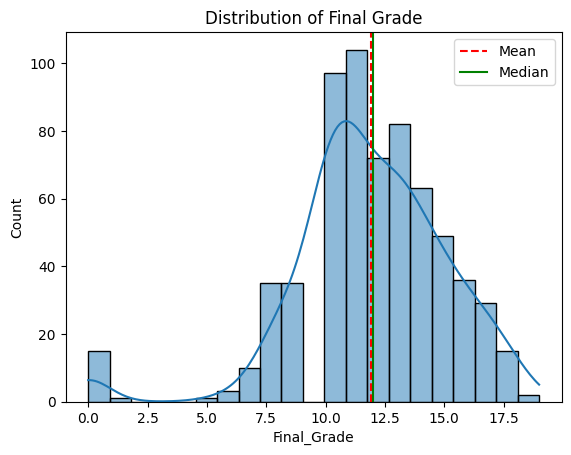

In [122]:
# Histogram for "Final_Grade"

sns.histplot(df["Final_Grade"], kde=True)
plt.title("Distribution of Final Grade")

# calculate mean and median
final_grade_mean = df["Final_Grade"].mean()
final_grade_median = df["Final_Grade"].median()

print("Mean:", final_grade_mean)
print("Median:", final_grade_median)


# add vertical lines for mean and median
plt.axvline(final_grade_mean, color="red", linestyle="--", label="Mean")
plt.axvline(final_grade_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Boxplot for identifying outliers in the numerical columns

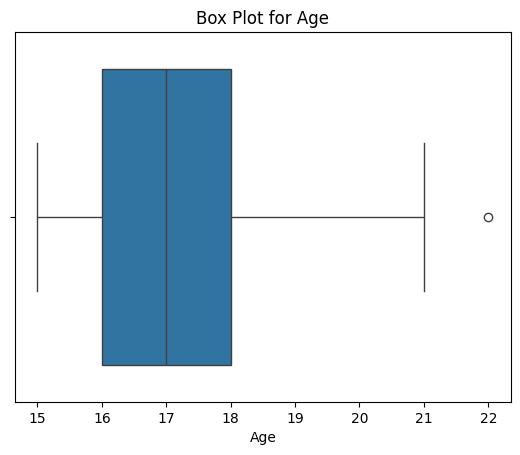

In [123]:
# box plot for age
sns.boxplot(x=df["Age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

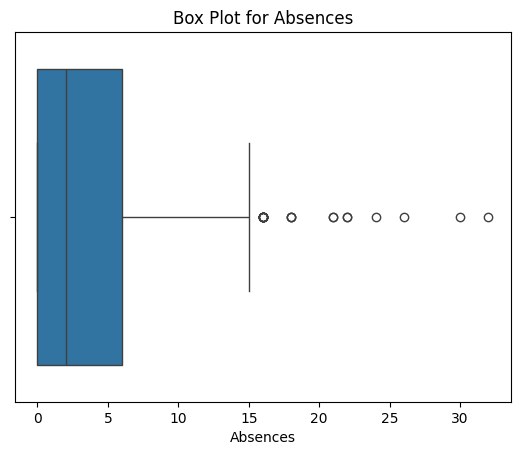

In [124]:
# box plot for absences
sns.boxplot(x=df["Number_of_Absences"])
plt.title("Box Plot for Absences")
plt.xlabel("Absences")
plt.show()

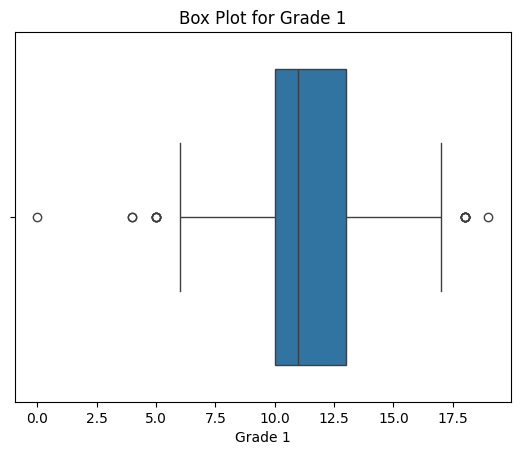

In [125]:
# box plot for Grade 1
sns.boxplot(x=df["Grade_1"])
plt.title("Box Plot for Grade 1")
plt.xlabel("Grade 1")
plt.show()

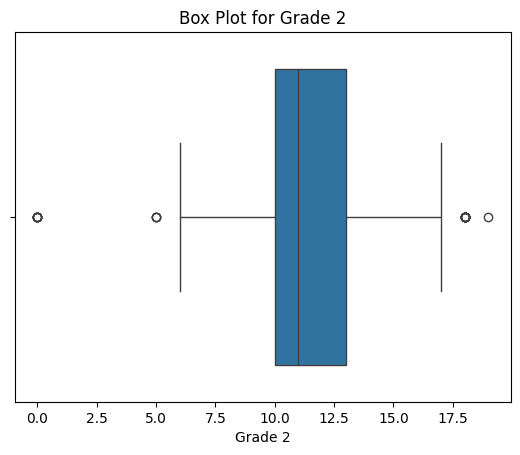

In [126]:
# box plot for Grade_2
sns.boxplot(x=df["Grade_2"])
plt.title("Box Plot for Grade 2")
plt.xlabel("Grade 2")
plt.show()

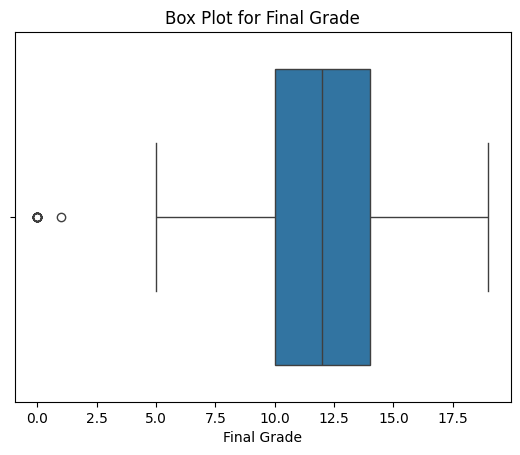

In [127]:
# box plot for Final_Grade
sns.boxplot(x=df["Final_Grade"])
plt.title("Box Plot for Final Grade")
plt.xlabel("Final Grade")
plt.show()

Counting the number of Outliers

In [128]:
# count the outliers in AGE using IQR method
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]

#The value is less than the lower bound, or The value is greater than the upper bound

In [129]:
len(age_outliers)

1

In [130]:
# count the outliers in ABSENCES using IQR method
Q1 = df["Number_of_Absences"].quantile(0.25)
Q3 = df["Number_of_Absences"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
absences_outliers = df[(df["Number_of_Absences"] < lower_bound) | (df["Number_of_Absences"] > upper_bound)]

#The value is less than the lower bound, or The value is greater than the upper bound

In [131]:
len(absences_outliers)

21

In [132]:
# count the outliers in FIRST GRADE using IQR method
Q1 = df["Grade_1"].quantile(0.25)
Q3 = df["Grade_1"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
grade_1_outliers = df[(df["Grade_1"] < lower_bound) | (df["Grade_1"] > upper_bound)]

#The value is less than the lower bound, or The value is greater than the upper bound

In [133]:
len(grade_1_outliers)

16

In [134]:
# count the outliers in SECOND GRADE using IQR method
Q1 = df["Grade_2"].quantile(0.25)
Q3 = df["Grade_2"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
grade_2_outliers = df[(df["Grade_2"] < lower_bound) | (df["Grade_2"] > upper_bound)]

#The value is less than the lower bound, or The value is greater than the upper bound

In [135]:
len(grade_2_outliers)

25

In [136]:
# count the outliers in FINAL GRADE using IQR method
Q1 = df["Final_Grade"].quantile(0.25)
Q3 = df["Final_Grade"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_grade_outliers = df[(df["Final_Grade"] < lower_bound) | (df["Final_Grade"] > upper_bound)]

#The value is less than the lower bound, or The value is greater than the upper bound

In [137]:
len(final_grade_outliers)

16

Handling Outliers

In [138]:
#AGE
# Step: Find the median
median_age = df["Age"].median()

# Step: Replace outliers with the median
df.loc[df["Age"] < lower_bound, "Age"] = median_age
df.loc[df["Age"] > upper_bound, "Age"] = median_age

print("Outliers in age column have been replaced with the median.")

#df.loc[...]:Access rows in the DataFrame by condition
#It finds all the rows in the DataFrame where the "age" is less than the lower bound (i.e., too small), and replaces those values with the median.

Outliers in age column have been replaced with the median.


In [139]:
# Calculate IQR bounds for Number_of_Absences
Q1 = df["Number_of_Absences"].quantile(0.25)
Q3 = df["Number_of_Absences"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# we have calculated this again coz if not done , the upper limit and lower limit would come from age column

# Median for Number_of_Absences
median_absences = df["Number_of_Absences"].median()

# Replace outliers with median
df.loc[df["Number_of_Absences"] < lower_bound, "Number_of_Absences"] = median_absences
df.loc[df["Number_of_Absences"] > upper_bound, "Number_of_Absences"] = median_absences

print("Outliers in Number_of_Absences column have been replaced with the median.")

Outliers in Number_of_Absences column have been replaced with the median.


In [140]:
# Calculate IQR bounds for Grade_1
Q1 = df["Grade_1"].quantile(0.25)
Q3 = df["Grade_1"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median for Grade_1
median_grade_1 = df["Grade_1"].median()

# Replace outliers with median
df.loc[df["Grade_1"] < lower_bound, "Grade_1"] = median_grade_1
df.loc[df["Grade_1"] > upper_bound, "Grade_1"] = median_grade_1

print("Outliers in Grade_1 column have been replaced with the median.")

Outliers in Grade_1 column have been replaced with the median.


In [141]:
# Calculate IQR bounds for Grade_2
Q1 = df["Grade_2"].quantile(0.25)
Q3 = df["Grade_2"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median for Grade_2
median_grade_2 = df["Grade_2"].median()

# Replace outliers with median
df.loc[df["Grade_2"] < lower_bound, "Grade_2"] = median_grade_2
df.loc[df["Grade_2"] > upper_bound, "Grade_2"] = median_grade_2

print("Outliers in Grade_2 column have been replaced with the median.")

Outliers in Grade_2 column have been replaced with the median.


In [142]:
# Calculate IQR bounds for Final_Grade
Q1 = df["Final_Grade"].quantile(0.25)
Q3 = df["Final_Grade"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Median for Final_Grade
median_final_grade = df["Final_Grade"].median()

# Replace outliers with median
df.loc[df["Final_Grade"] < lower_bound, "Final_Grade"] = median_final_grade
df.loc[df["Final_Grade"] > upper_bound, "Final_Grade"] = median_final_grade

print("Outliers in Final_Grade column have been replaced with the median.")

Outliers in Final_Grade column have been replaced with the median.


Univariate Ananlysis of Categorical Columns

In [143]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

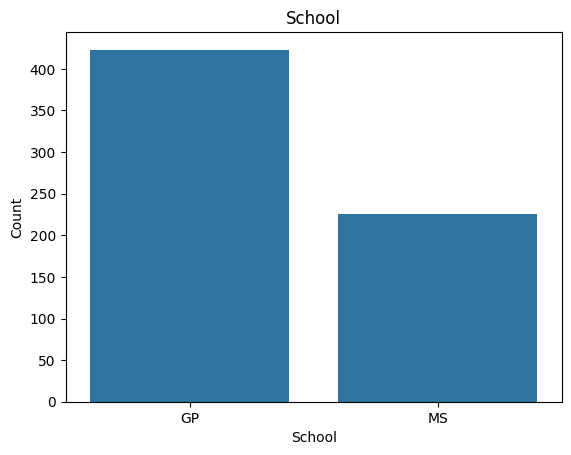

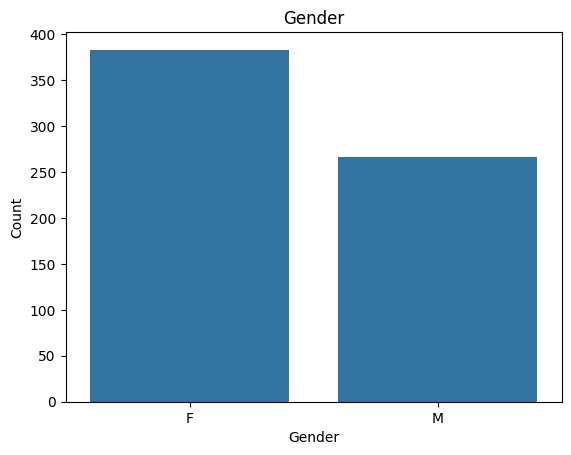

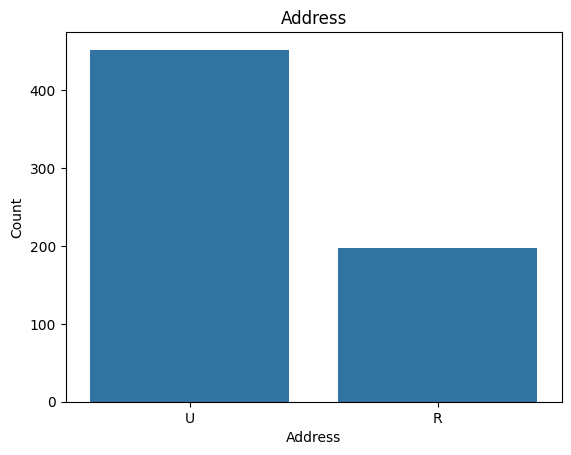

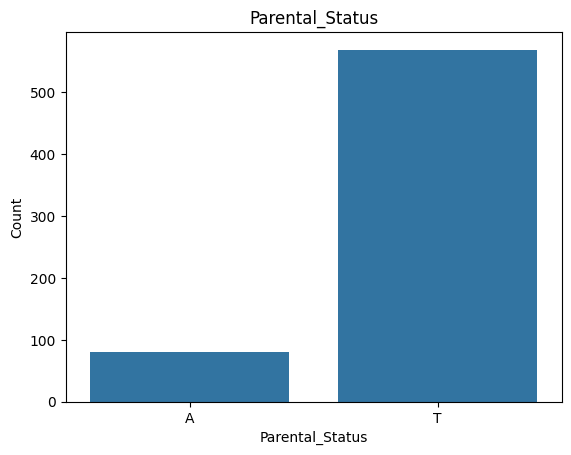

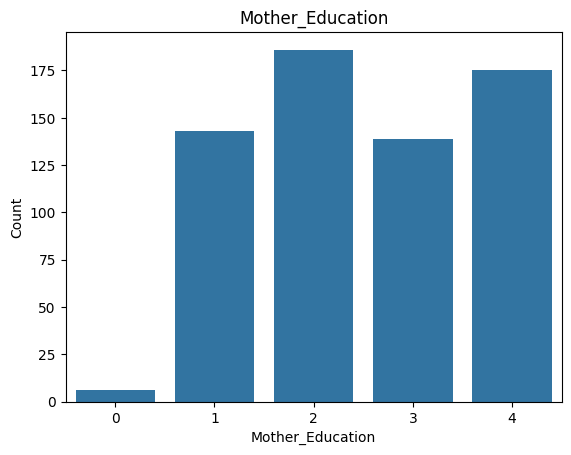

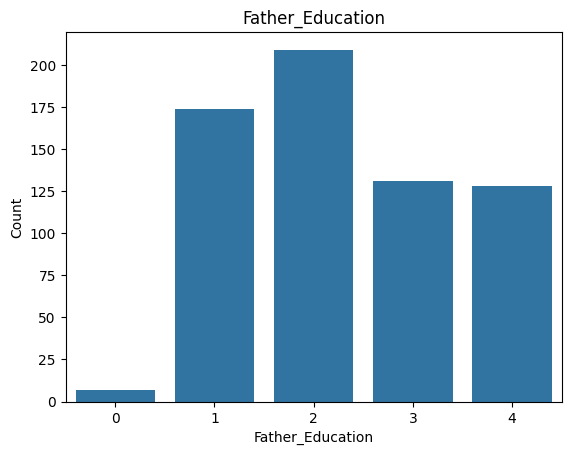

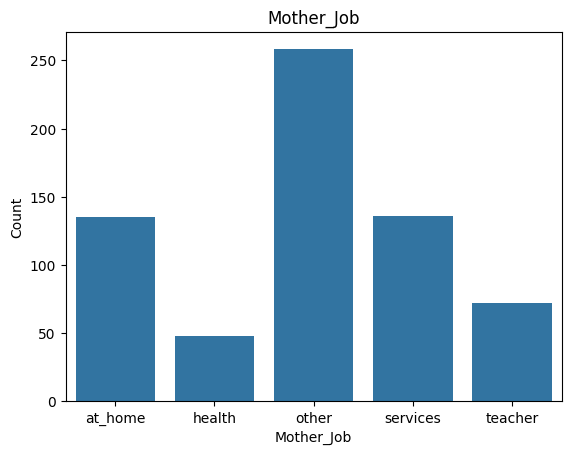

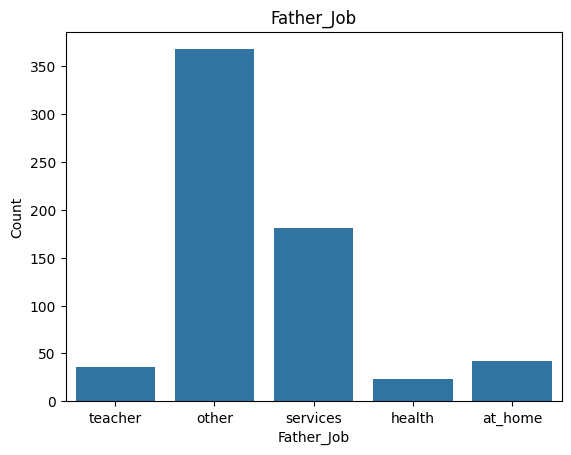

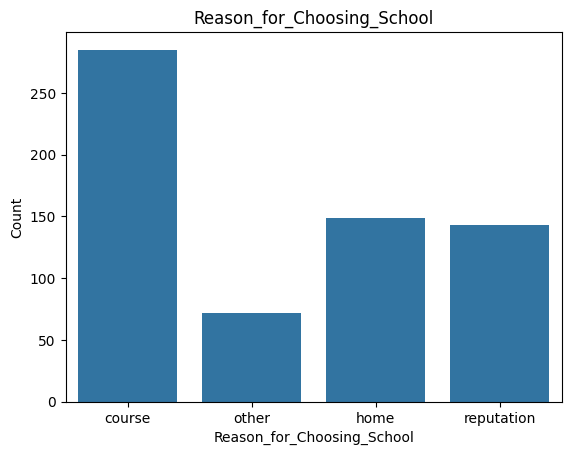

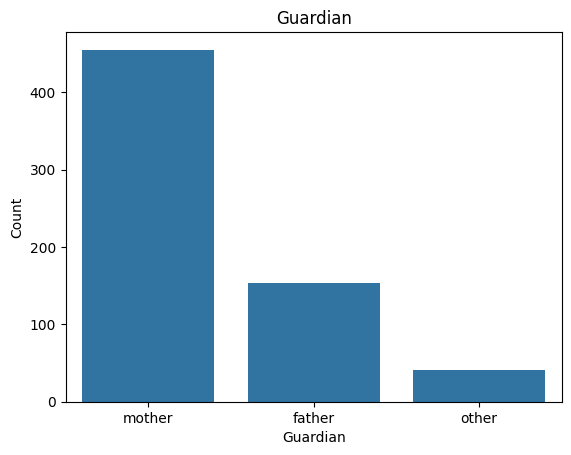

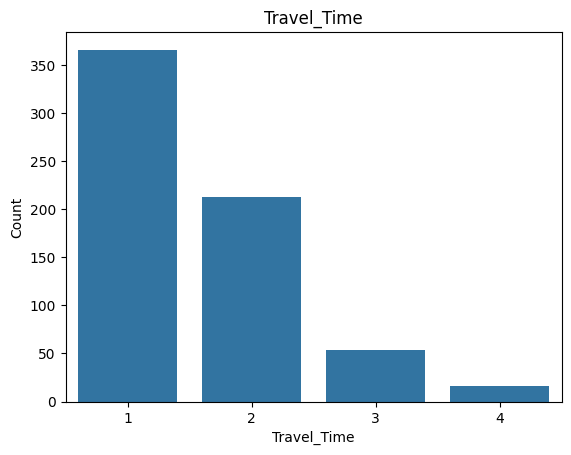

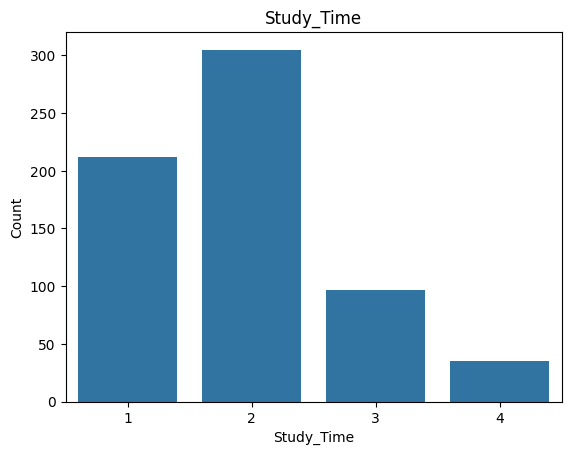

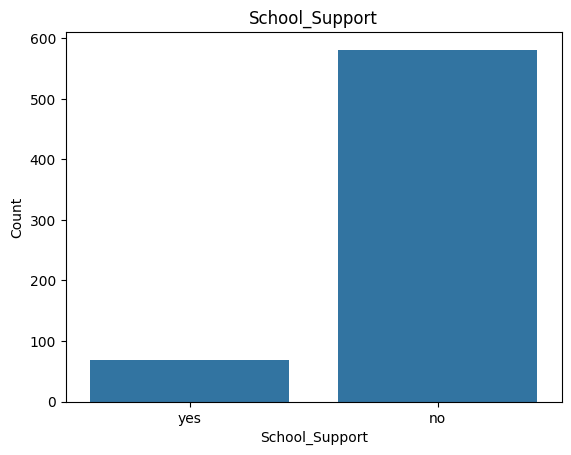

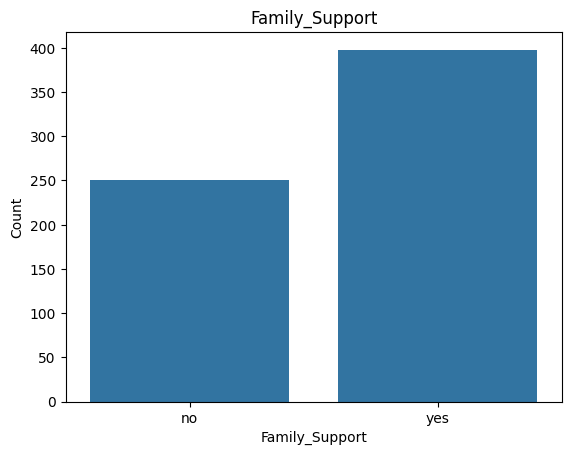

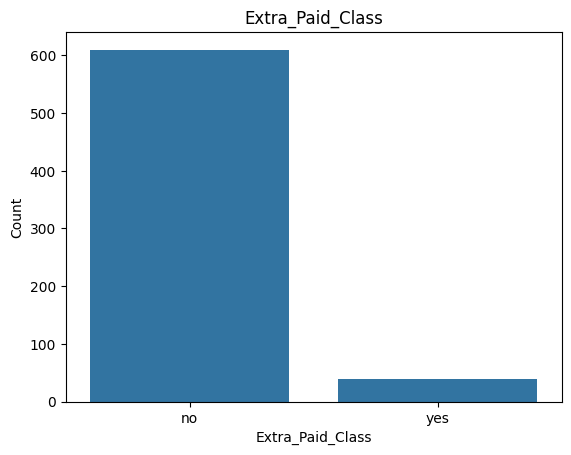

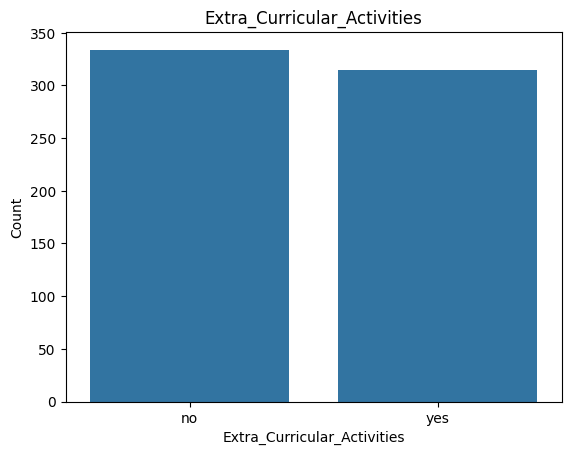

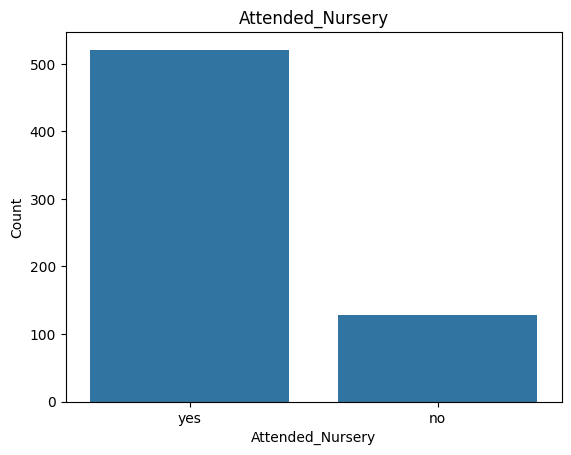

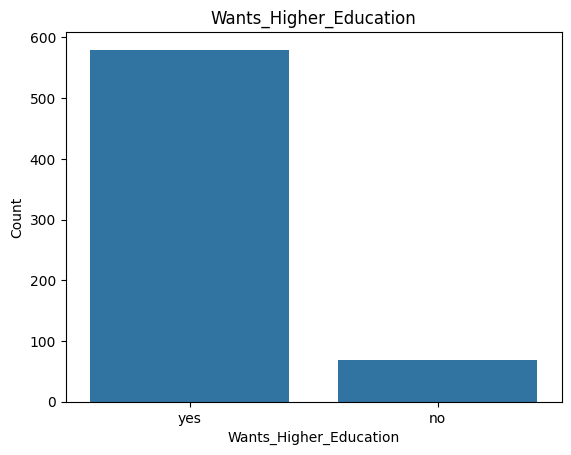

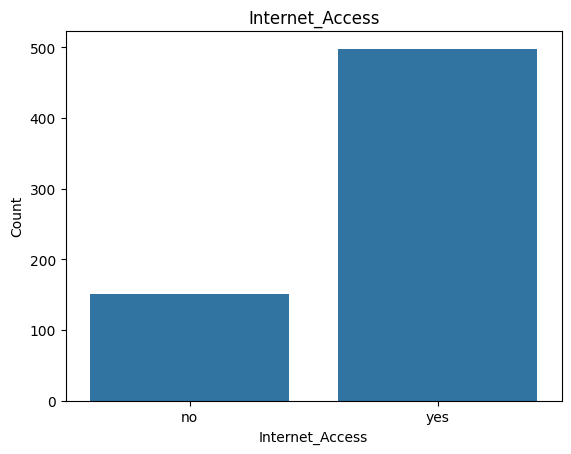

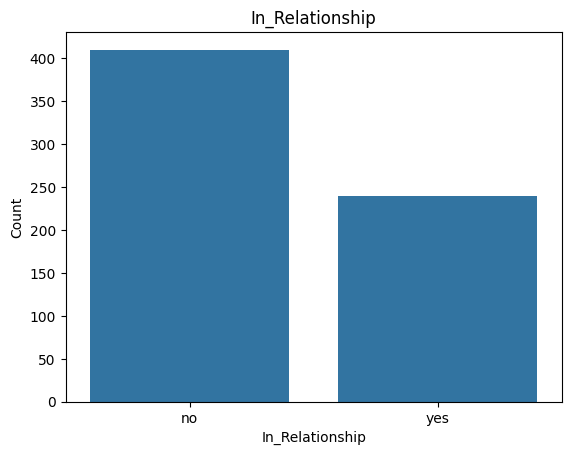

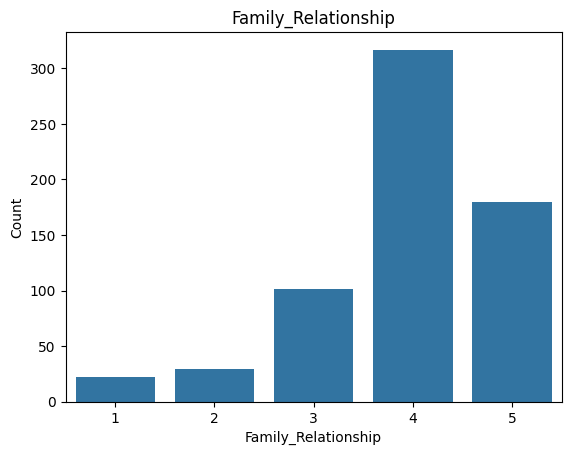

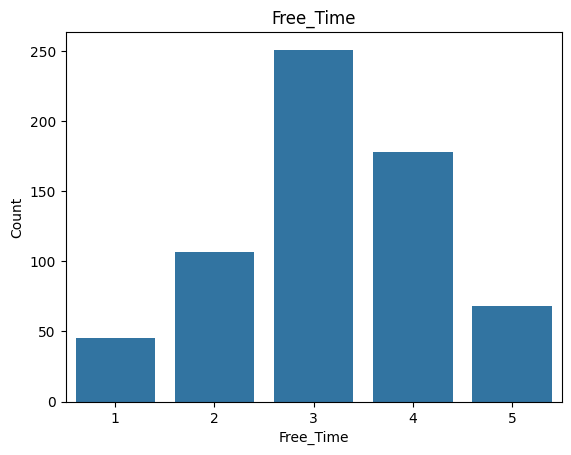

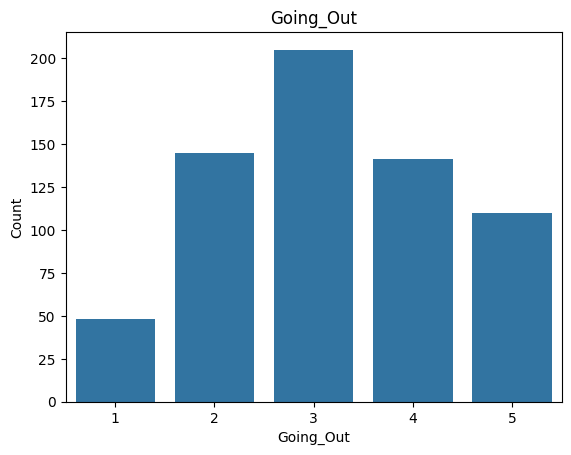

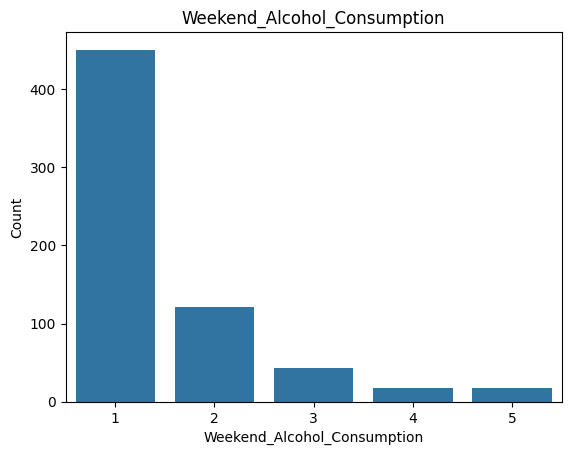

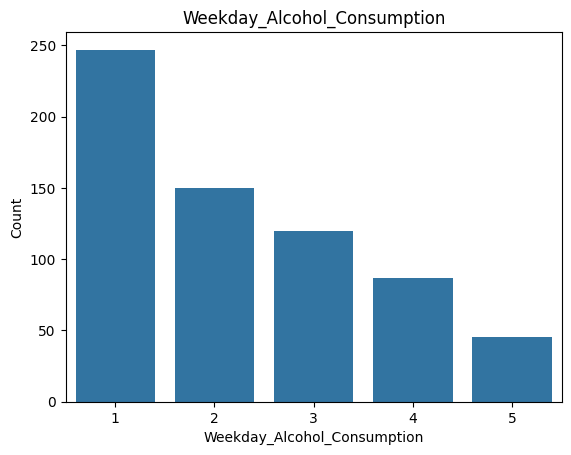

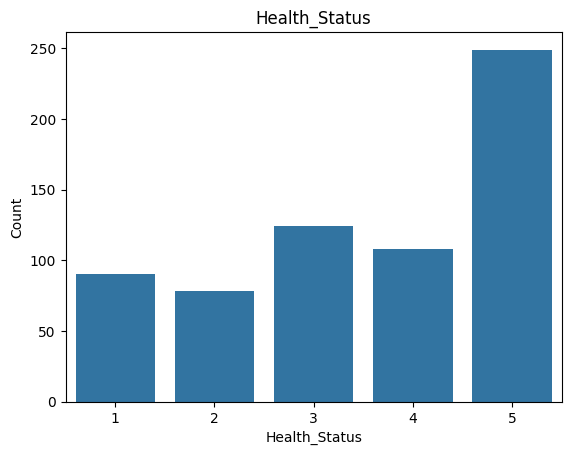

In [144]:
categorical_columns = ['School', 'Gender', 'Address', 'Parental_Status', 'Mother_Education', 'Father_Education',
       'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian', 'Travel_Time',
       'Study_Time', 'School_Support', 'Family_Support', 'Extra_Paid_Class', 'Extra_Curricular_Activities',
       'Attended_Nursery','Wants_Higher_Education','Internet_Access','In_Relationship','Family_Relationship','Free_Time',
       'Going_Out','Weekend_Alcohol_Consumption','Weekday_Alcohol_Consumption','Health_Status']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()


  #is used to create count plots (bar plots) for all categorical columns in a dataset
  # using Seaborn and Matplotlib.
  #for col in categorical_columns:	Goes through each column name in your categorical_columns list

Label Encoding

In [145]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

#It finds all the columns in your DataFrame (df) that have data type object,
#and saves their names in a list called object_columns.
#object means non-numeric data — usually strings (like names, categories, yes/no, etc.)
#These are typically the categorical columns you will need to encode before using in ML model

In [146]:
print(object_columns)

Index(['School', 'Gender', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Job', 'Father_Job', 'Reason_for_Choosing_School', 'Guardian',
       'School_Support', 'Family_Support', 'Extra_Paid_Class',
       'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship'],
      dtype='object')


In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder   # saving the encoder for this column


#encoders = {}	Create an empty dictionary to store label encoders for each column
#encoders[column] = label_encoder	Save the encoder in the dictionary with column name as key

In [149]:
encoders

#encoders is a Python dictionary that stores the
# LabelEncoder objects for each categorical column in your DataFrame.

{'School': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Address': LabelEncoder(),
 'Family_Size': LabelEncoder(),
 'Parental_Status': LabelEncoder(),
 'Mother_Job': LabelEncoder(),
 'Father_Job': LabelEncoder(),
 'Reason_for_Choosing_School': LabelEncoder(),
 'Guardian': LabelEncoder(),
 'School_Support': LabelEncoder(),
 'Family_Support': LabelEncoder(),
 'Extra_Paid_Class': LabelEncoder(),
 'Extra_Curricular_Activities': LabelEncoder(),
 'Attended_Nursery': LabelEncoder(),
 'Wants_Higher_Education': LabelEncoder(),
 'Internet_Access': LabelEncoder(),
 'In_Relationship': LabelEncoder()}

In [150]:
for column, encoder in encoders.items():
    print(f"\n Encoding for column: {column}")
    for idx, label in enumerate(encoder.classes_):
        print(f"  {label} → {idx}")

#This code displays the label encoding mapping for each categorical column that was encoded using LabelEncoder
#Once it's fitted using .fit() or .fit_transform(), a LabelEncoder object stores: classes_ (most important attribute)
#This is an array of the unique classes (labels) it has learned, sorted in lexicographical order.
#encoder.classes_ is an attribute of LabelEncoder that contains the original string labels (before encoding), in sorted order.
#enumerate() gives you both: idx: the integer code assigned to the label, label: the original category value (e.g., "Male" or "Female")


 Encoding for column: School
  GP → 0
  MS → 1

 Encoding for column: Gender
  F → 0
  M → 1

 Encoding for column: Address
  R → 0
  U → 1

 Encoding for column: Family_Size
  GT3 → 0
  LE3 → 1

 Encoding for column: Parental_Status
  A → 0
  T → 1

 Encoding for column: Mother_Job
  at_home → 0
  health → 1
  other → 2
  services → 3
  teacher → 4

 Encoding for column: Father_Job
  at_home → 0
  health → 1
  other → 2
  services → 3
  teacher → 4

 Encoding for column: Reason_for_Choosing_School
  course → 0
  home → 1
  other → 2
  reputation → 3

 Encoding for column: Guardian
  father → 0
  mother → 1
  other → 2

 Encoding for column: School_Support
  no → 0
  yes → 1

 Encoding for column: Family_Support
  no → 0
  yes → 1

 Encoding for column: Extra_Paid_Class
  no → 0
  yes → 1

 Encoding for column: Extra_Curricular_Activities
  no → 0
  yes → 1

 Encoding for column: Attended_Nursery
  no → 0
  yes → 1

 Encoding for column: Wants_Higher_Education
  no → 0
  yes → 1

 Enc

In [151]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,11,11,11,False
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,False
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,False
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,False
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,False


In [152]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

#When you print a DataFrame with many columns, pandas by default hides some of them and shows ... in the middle.
#To see all columns without truncation
# None tells Pandas: "Show all columns, no matter how many there are."

In [153]:
df.sample()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
590,1,0,18,1,0,1,1,1,2,2,0,1,3,2,2,0,0,0,1,1,1,0,1,3,4,4,2,2,5,3,7,8,7,True


Bivariate Analysis

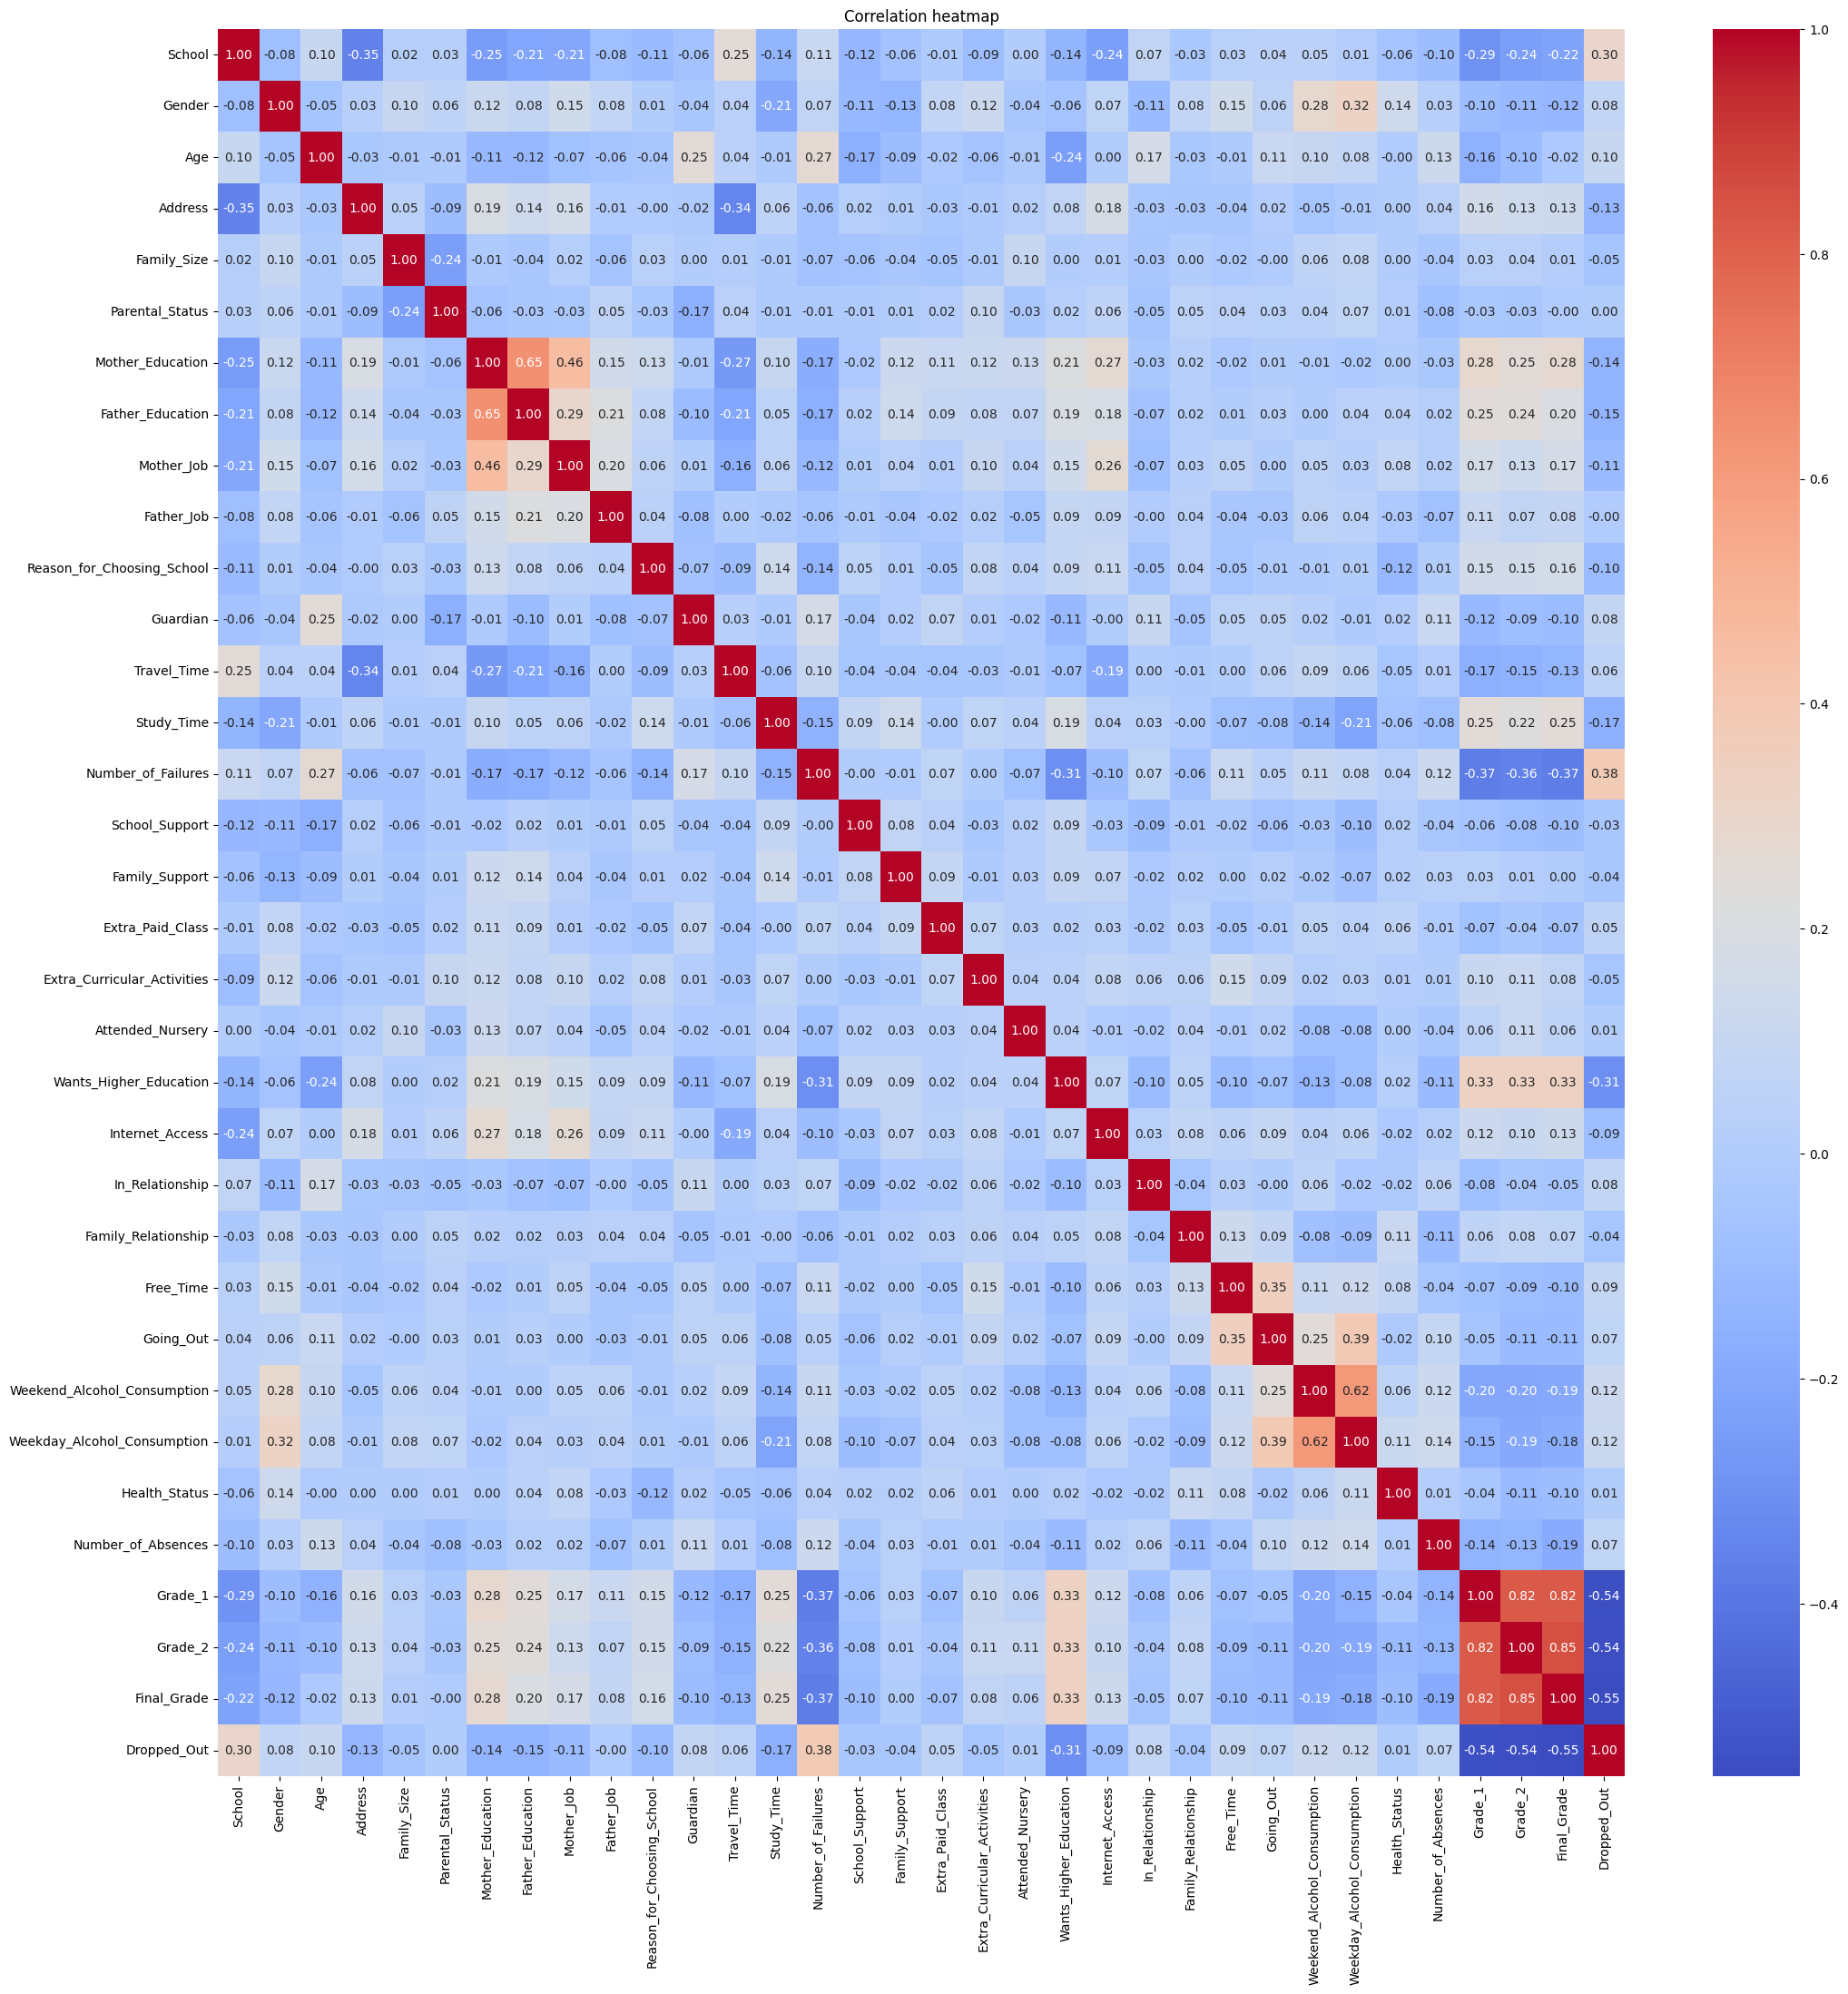

In [154]:
# correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

#df.corr():Calculates the correlation matrix for all numeric columns in your dataset.
#Tells how strongly each column is related to the others.


In [155]:
# Get correlation of all features with the target column
correlation_with_target = df.corr(numeric_only=True)['Dropped_Out']

In [156]:
correlation_with_target

,Dropped_Out
School,0.297217
Gender,0.078222
Age,0.103720
Address,-0.126663
Family_Size,-0.052215
Parental_Status,0.004241
Mother_Education,-0.144803
Father_Education,-0.146249
Mother_Job,-0.106564
Father_Job,-0.002454


In [157]:
# Show features with weak correlation (less than 0.1)
weak_features = correlation_with_target[correlation_with_target.abs() < 0.01]

#features that have a weak correlation with the target — specifically
#features whose absolute correlation is less than 0.1.

print("Features with very weak or no correlation with Class/ASD:\n")
print(weak_features)
len(weak_features)

Features with very weak or no correlation with Class/ASD:

Parental_Status     0.004241
Father_Job         -0.002454
Attended_Nursery    0.007751
Health_Status       0.009979
Name: Dropped_Out, dtype: float64


4

In [158]:
# Step 2: Drop those columns from the DataFrame
df = df.drop(columns=weak_features.index)

In [159]:
df.shape

(649, 30)

In [160]:
# Drop the target itself from the list
# correlation_with_target = correlation_with_target.drop("Dropped_Out")
#### already done

In [161]:
df.shape

(649, 30)

In [162]:
df["Dropped_Out"].value_counts()

,count
Dropped_Out,
False,549
True,100


**INSIGHTS FROM EDA**


1.   There are outliers in numerical columns (age, number of asbsences, first grade, second grade and final grade)
2.   There is class imbalance in target column
3. There is class imbalance in categorical columns
4. Found out the correlation of each feature with reespect to the target
5. Performed label encoding and saved the encoder



In [163]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Mother_Education',
       'Father_Education', 'Mother_Job', 'Reason_for_Choosing_School',
       'Guardian', 'Travel_Time', 'Study_Time', 'Number_of_Failures',
       'School_Support', 'Family_Support', 'Extra_Paid_Class',
       'Extra_Curricular_Activities', 'Wants_Higher_Education',
       'Internet_Access', 'In_Relationship', 'Family_Relationship',
       'Free_Time', 'Going_Out', 'Weekend_Alcohol_Consumption',
       'Weekday_Alcohol_Consumption', 'Number_of_Absences', 'Grade_1',
       'Grade_2', 'Final_Grade', 'Dropped_Out'],
      dtype='object')

In [164]:
# defining features and target column
x = df.drop(columns=["Dropped_Out"])
y = df["Dropped_Out"]

In [165]:
x

,School,Gender,Age,Address,Family_Size,Mother_Education,Father_Education,Mother_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Number_of_Absences,Grade_1,Grade_2,Final_Grade
0,0,0,18,1,0,4,4,0,0,1,2,2,0,1,0,0,0,1,0,0,4,3,4,1,1,4,11,11,11
1,0,0,17,1,0,1,1,0,0,0,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,2,9,11,11
2,0,0,15,1,1,1,1,0,2,1,1,2,0,1,0,0,0,1,1,0,4,3,2,2,3,6,12,13,12
3,0,0,15,1,0,4,2,1,1,1,1,3,0,0,1,0,1,1,1,1,3,2,2,1,1,0,14,14,14
4,0,0,16,1,0,3,3,2,1,0,1,2,0,0,1,0,0,1,0,0,4,3,2,1,2,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,2,3,3,0,1,1,3,1,0,0,0,1,1,1,0,5,4,2,1,2,4,10,11,10
645,1,0,18,1,1,3,1,4,0,1,1,2,0,0,1,0,0,1,1,0,4,3,4,1,1,4,15,15,16
646,1,0,18,1,0,1,1,2,0,1,2,2,0,0,0,0,1,1,0,0,1,1,1,1,1,6,11,12,9
647,1,1,17,1,1,3,1,3,0,1,2,1,0,0,0,0,0,1,1,0,2,4,5,3,4,6,10,10,10


In [166]:
y

,Dropped_Out
0,False
1,False
2,False
3,False
4,False
...,...
644,False
645,False
646,True
647,False


In [167]:
#Split the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [168]:
x_train.shape

(519, 29)

In [169]:
print(y_train.shape)
print(y_test.shape)

(519,)
(130,)


In [170]:
y_train.value_counts()

,count
Dropped_Out,
False,439
True,80


In [171]:
y_test.value_counts()

,count
Dropped_Out,
False,110
True,20


4. SPLITTING TRAINING AND TESTING SET

**SMOTE (Synthetic Minority Oversampling technique)**

Formula:

New Point=A+λ×(B−A)

Where 𝜆 λ is a random number between 0 and 1

In [172]:
smote = SMOTE(random_state=42)

#random_state=42:So every time you run the code, you get the same result

In [173]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#.fit_resample(X_train, y_train)	Applies SMOTE only on the training data

In [174]:
print(x_train_smote.shape)

(878, 29)


In [175]:
print(y_train_smote.shape)

(878,)


In [176]:
print(y_train_smote.value_counts())

Dropped_Out
False    439
True     439
Name: count, dtype: int64


In [196]:
# scaling the numerical columns
from sklearn.preprocessing import StandardScaler

In [178]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_smote)
X_test_scaled = scaler.transform(x_test)

5. MODEL TRAINING




In [179]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [180]:
# Step 2: Create an empty dictionary to store scores
cv_scores = {}

# Step 3: Train and evaluate each model using 5-fold cross-validation
for name, model in models.items():

    # Perform 5-fold cross-validation using accuracy as the metric
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")

    # Save scores in the dictionary
    cv_scores[name] = scores

    # Print average accuracy
    print(name, "Average Accuracy:", round(np.mean(scores), 4))

#It goes through each model in your models dictionary
#name is the model name as a string
#model is the actual model object
#for name, model in models.items():
#is a loop that:
#Assigns name = the key (e.g., "Decision Tree")
#Assigns model = the value (e.g., DecisionTreeClassifier())



Decision Tree Average Accuracy: 0.9761
Random Forest Average Accuracy: 0.9886
XGBoost Average Accuracy: 0.9909


In [181]:
cv_scores

{'Decision Tree': array([0.96590909, 0.95454545, 0.99431818, 0.98857143, 0.97714286]),
 'Random Forest': array([0.97159091, 1.        , 0.99431818, 0.99428571, 0.98285714]),
 'XGBoost': array([0.98295455, 0.98863636, 0.99431818, 0.99428571, 0.99428571])}

6. MODEL SELECTION AND HYPER-PARAMETER TUNING

In [182]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [183]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

#learning_rate	[0.01, 0.1, 0.2, 0.3]	Controls how much the model learns with each tree (lower = slower, safer)
#subsample	[0.5, 0.7, 1.0]	% of rows used per tree (1.0 = all rows; less = more randomness)
#colsample_bytree	[0.5, 0.7, 1.0]	% of features used per tree (adds randomness to reduce overfitting)

In [184]:
# hyperparameter tuning for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


#n_iter=20	The number of random combinations to try. Instead of checking all combinations (as in GridSearchCV), it will randomly sample 20 of them.

In [185]:
# fit the models
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [186]:
random_search_dt.best_estimator_

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

In [187]:
random_search_dt.best_score_

np.float64(0.9851883116883118)

In [188]:
random_search_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [189]:
random_search_rf.best_score_

np.float64(0.9920324675324675)

In [190]:
random_search_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [191]:
random_search_xgb.best_score_

np.float64(0.992038961038961)

In [192]:
# Get the model with best score

best_model = None
best_score = 0

#best_model: will hold the best-performing model
#best_score: starts with 0 and will be updated with the highest score


if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_


#random_search_dt.best_score_ (0.85) > best_score (0):
#Yes → Set best_model = random_search_dt.best_estimator_, best_score = 0.85
#random_search_rf.best_score_ (0.919) > best_score (0.85):
#Yes → Set best_model = random_search_rf.best_estimator_, best_score = 0.919
#random_search_xgb.best_score_ (0.90) > best_score (0.919):
#No: Set best_model = random_search_rf.best_estimator_, best_score = 0.919


In [193]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
Best Cross-Validation Accuracy: 0.99


7. Evaluation

In [194]:
# evaluate on test data
y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.9692307692307692
Confusion Matrix:
 [[109   1]
 [  3  17]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       110
        True       0.94      0.85      0.89        20

    accuracy                           0.97       130
   macro avg       0.96      0.92      0.94       130
weighted avg       0.97      0.97      0.97       130



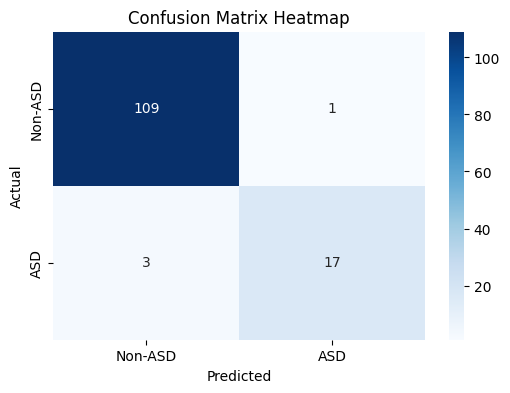

In [195]:
# Plot the confusion matrix using seaborn heatmap
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=["Non-ASD", "ASD"], yticklabels=["Non-ASD", "ASD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
